In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [67]:
humanFreedomIndex = pd.read_csv('../Datasets/hfi_cc_2018.csv')
hfi = pd.read_csv("../Datasets/hfi_cc_2018.csv")
aux =  pd.read_csv("../Datasets/GDPC (copy).csv")

In [68]:
aux = aux.sort_values('Countries')
aux_1 = aux.drop('Countries', axis=1).T


In [69]:
x = aux_1[:][0]
y = aux_1[:][1]
z = pd.concat([x, y])
for i in range(2,156):
    y = aux_1[:][i]
    z = pd.concat([z, y])
dataset = pd.DataFrame({'PIB':z})

In [70]:
hfi_sorted = hfi.sort_values(['countries', 'year'])
hfi_sorted['PIB'] = dataset.values

In [71]:
table = pd.pivot_table(hfi_sorted,values=hfi_sorted.columns.to_list()[4:],index=['year','countries'], dropna=False)

# Correlação:

* Sperman
* Regularização
* Laço
* Treshold

In [74]:
table.xs(2009).sort_values('PIB')

,PIB,ef_government,ef_government_consumption,ef_government_enterprises,ef_government_tax,ef_government_tax_income,ef_government_tax_payroll,ef_government_transfers,ef_legal,ef_legal_courts,...,pf_ss_disappearances_injuries,pf_ss_disappearances_organized,pf_ss_disappearances_violent,pf_ss_homicide,pf_ss_women,pf_ss_women_fgm,pf_ss_women_inheritance,pf_ss_women_inheritance_daughters,pf_ss_women_inheritance_widows,pf_ss_women_missing
countries,,,,,,,,,,,,,,,,,,,,,
Guinea-Bissau,8.267987e+08,4.250644,8.501288,0.0,NaN,NaN,NaN,NaN,2.947435,3.100000,...,10.000000,2.5,10.000000,5.810474,5.000000,5.0,0.0,NaN,NaN,10.0
Seychelles,8.473979e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Gambia, The",9.006395e+08,NaN,NaN,2.0,NaN,NaN,NaN,9.579510,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bhutan,1.264758e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Belize,1.335218e+09,7.430774,6.088235,7.0,NaN,NaN,NaN,9.204087,5.058028,4.900000,...,10.000000,NaN,10.000000,0.000000,10.000000,NaN,10.0,NaN,NaN,10.0
Cape Verde,1.711817e+09,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Liberia,1.768000e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Lesotho,1.773200e+09,4.898421,3.500000,2.0,NaN,NaN,NaN,9.195264,4.429826,3.069094,...,10.000000,7.5,10.000000,0.000000,5.000000,5.0,0.0,NaN,NaN,10.0
Burundi,1.781455e+09,5.319106,4.529412,2.0,NaN,NaN,NaN,9.427906,2.897703,2.933534,...,10.000000,2.5,10.000000,8.228302,8.333333,10.0,5.0,NaN,NaN,10.0


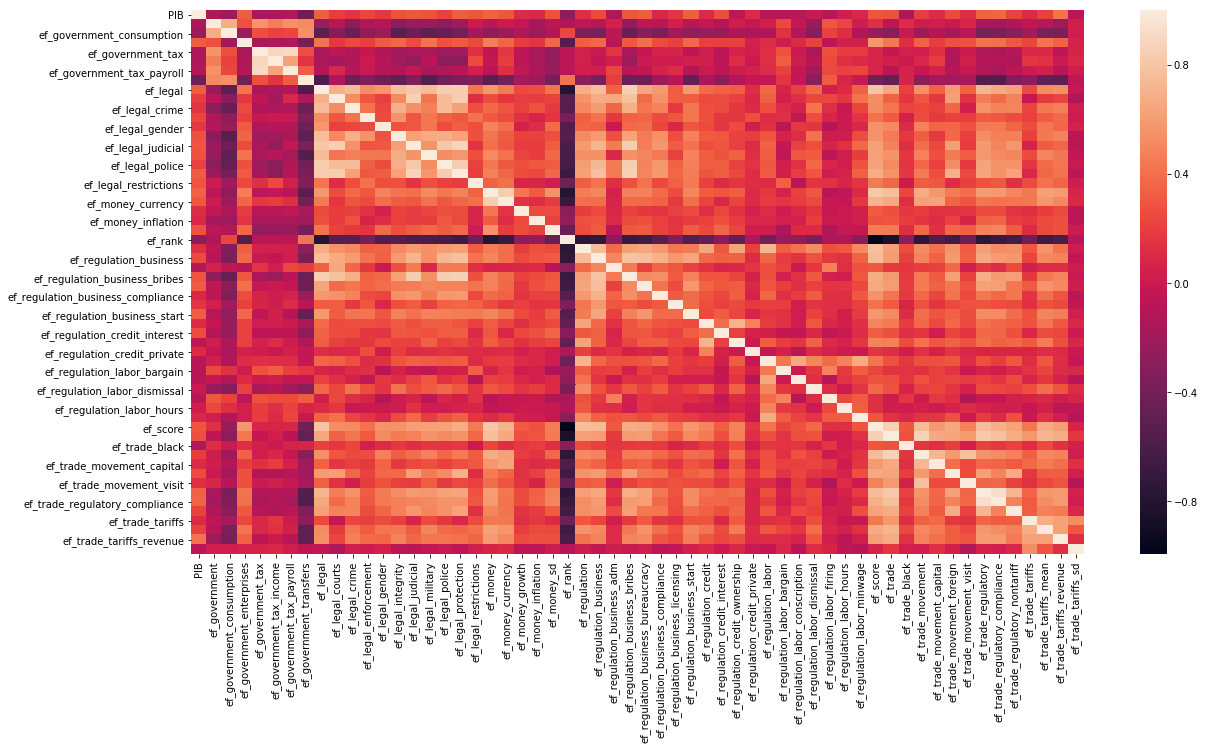

In [34]:
trans = table.transpose()
tr = trans[:58].transpose()
plt.rcParams['figure.figsize']=20,10
sns.heatmap(tr.corr(method='spearman'));

In [35]:
tr_2 = trans[61:]
tr_2 = tr_2.transpose()
tr_2['PIB'] = trans.transpose()['PIB']

In [36]:
corr_matrix = table.corr()
#corr_matrix['PIB'].sort_values(ascending=False)

In [37]:
regression_dataframe = hfi_sorted.drop(['ISO_code','countries','region'],axis = 1)
#regression_dataframe.isnull()

In [38]:
regression_dataframe = regression_dataframe.fillna(0,axis = 'columns')
regression_dataframe = regression_dataframe.fillna(0,axis = 'rows')
#regression_dataframe.isnull()

In [39]:
from sklearn.model_selection import train_test_split
X = regression_dataframe.drop('PIB',axis = 1)
y = regression_dataframe['PIB']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3,random_state=42)

In [40]:
complete = pd.read_csv('../Datasets/CompleteDataset.csv')

In [51]:
table = pd.pivot_table(complete,values=complete.columns.to_list()[4:],index=['year','countries'],dropna=True)

In [65]:
table.xs(2009).sort_values('PIB')

,PIB,Variation,ef_government,ef_government_consumption,ef_government_enterprises,ef_government_tax,ef_government_tax_income,ef_government_tax_payroll,ef_government_transfers,ef_legal,...,pf_ss_disappearances_injuries,pf_ss_disappearances_organized,pf_ss_disappearances_violent,pf_ss_homicide,pf_ss_women,pf_ss_women_fgm,pf_ss_women_inheritance,pf_ss_women_inheritance_daughters,pf_ss_women_inheritance_widows,pf_ss_women_missing
countries,,,,,,,,,,,,,,,,,,,,,
Guinea-Bissau,8.267987e+08,-0.043782,4.250644,8.501288,0.0,NaN,NaN,NaN,NaN,2.947435,...,10.000000,2.50,10.000000,5.810474,5.000000,5.0,0.0,NaN,NaN,10.0
Seychelles,8.473979e+08,-0.123865,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Gambia, The",9.006395e+08,-0.067450,NaN,NaN,2.0,NaN,NaN,NaN,9.579510,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bhutan,1.264758e+09,0.005107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Belize,1.335218e+09,-0.024410,7.430774,6.088235,7.0,NaN,NaN,NaN,9.204087,5.058028,...,10.000000,NaN,10.000000,0.000000,10.000000,NaN,10.0,NaN,NaN,10.0
Cape Verde,1.711817e+09,-0.043321,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Liberia,1.768000e+09,0.024334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Lesotho,1.773200e+09,0.008339,4.898421,3.500000,2.0,NaN,NaN,NaN,9.195264,4.429826,...,10.000000,7.50,10.000000,0.000000,5.000000,5.0,0.0,NaN,NaN,10.0
Burundi,1.781455e+09,0.105234,5.319106,4.529412,2.0,NaN,NaN,NaN,9.427906,2.897703,...,10.000000,2.50,10.000000,8.228302,8.333333,10.0,5.0,NaN,NaN,10.0


In [42]:
comp_2015 = table.xs(2015)
comp_2015 = comp_2015.fillna(0)

In [43]:
x_train = comp_2015.drop(['PIB','Variation'], axis=1)
y_train = comp_2015['Variation']

In [44]:
x_test = table.xs(2016).fillna(0).drop(['PIB','Variation'], axis=1)
y_test = table.xs(2016).fillna(0)['Variation']

In [45]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import accuracy_score

In [46]:
en_model = ElasticNet()

In [47]:
en_model.fit(x_train,y_train)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [48]:
y_predict = en_model.predict(x_test)

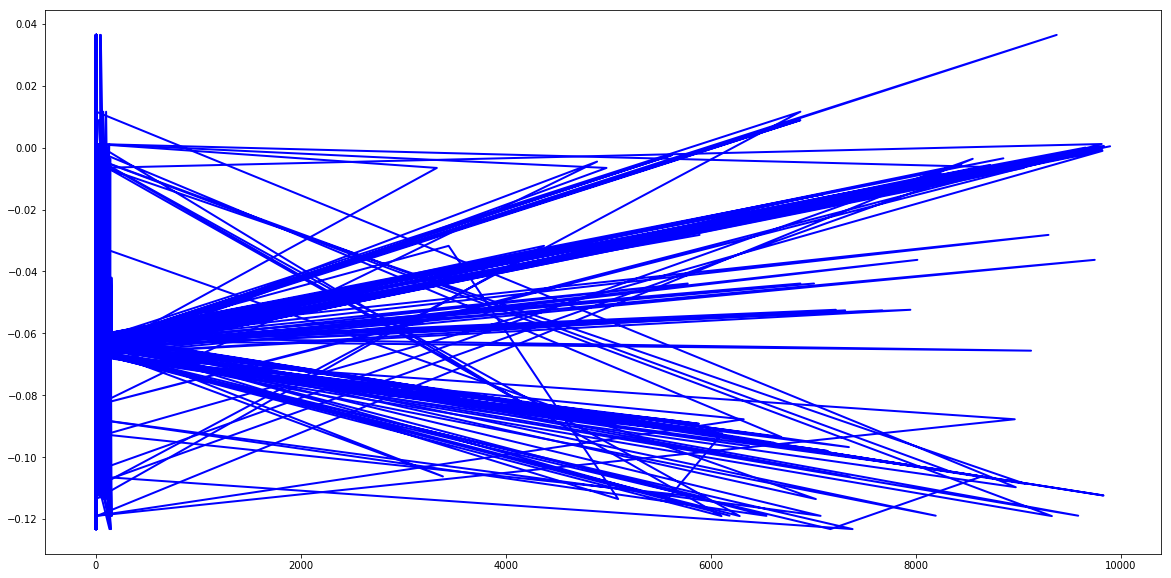

In [49]:
#plt.scatter(x_test, y_test,  color='blue')
plt.plot(x_test, y_predict, color='blue', linewidth=2)
plt.show()

In [50]:
table

PIB  Variation  ef_government  \
year countries                                                        
2008 Albania                 1.288135e+10   0.000000       8.238315   
     Algeria                 1.710007e+14   0.000000       3.494739   
     Angola                  8.853861e+10   0.000000       3.970588   
     Argentina               3.615580e+14   0.000000       6.068742   
     Armenia                 1.166204e+10   0.000000       8.762805   
     Australia               1.052585e+12   0.000000       6.798495   
     Austria                 4.302943e+14   0.000000       5.065515   
     Azerbaijan              4.885248e+10   0.000000       4.860729   
     Bahamas                 1.052600e+10   0.000000       8.287745   
     Bahrain                 2.571088e+10   0.000000       6.583811   
     Bangladesh              9.163128e+10   0.000000       8.829677   
     Barbados                4.782000e+09   0.000000       4.276186   
     Belarus                 6.076348e+10   0.000000            NaN   
     Belgium                 5.186259e+11   0.000000       4.197427   
     Belize                  1.368625e+09   0.000000       7.408377   
     Benin                   7.132787e+09   0.000000       6.623973   
     Bhutan                  1.258332e+09   0.000000            NaN   
     Bolivia                 1.667428e+10   0.000000       6.356922   
     Bosnia and Herzegovina  1.911274e+10   0.000000       6.439782   
     Botswana                1.094507e+10   0.000000       4.423361   
     Brazil                  1.695825e+12   0.000000       7.289833   
     Brunei Darussalam       1.439310e+10   0.000000            NaN   
     Bulgaria                5.440914e+10   0.000000       6.906896   
     Burkina Faso            8.369637e+09   0.000000       4.974510   
     Burundi                 1.611836e+09   0.000000       4.544596   
     Cambodia                1.035191e+10   0.000000            NaN   
     Cameroon                2.640978e+10   0.000000       6.097657   
     Canada                  1.549131e+12   0.000000       6.041132   
     Cape Verde              1.789334e+09   0.000000            NaN   
     Central Afr. Rep.       1.985241e+09   0.000000       7.063804   
...                                   ...        ...            ...   
2016 Seychelles              1.427525e+09   0.036322       6.326847   
     Sierra Leone            3.556037e+09  -0.157082       7.017647   
     Singapore               3.097639e+14   0.018633       7.919426   
     Slovak Rep.             8.984836e+13   0.023684       5.589831   
     Slovenia                4.470860e+10   0.037987       4.776775   
     South Africa            2.957466e+14  -0.068623       6.043834   
     Spain                   1.237499e+12   0.032037       6.019537   
     Sri Lanka               8.178742e+10   0.014681       8.261061   
     Sudan                   9.558438e+10  -0.016177       9.441176   
     Suriname                3.152174e+09  -0.338809       7.108696   
     Sweden                  5.122052e+14   0.028282       3.620603   
     Switzerland             6.701811e+14  -0.014196       7.425566   
     Tajikistan              6.952678e+09  -0.114827       6.526173   
     Tanzania                4.977402e+10   0.050559       7.314763   
     Thailand                4.117552e+11   0.025799       6.642646   
     Timor-Leste             2.521000e+09  -0.187927       6.119289   
     Togo                    4.457733e+09   0.066651       6.719904   
     Trinidad and Tobago     2.229559e+10  -0.086311       5.595294   
     Tunisia                 4.180838e+10  -0.031149       5.805729   
     Turkey                  8.637217e+14   0.004565       6.576430   
     Uganda                  2.413366e+13  -0.109546       8.287500   
     Ukraine                 9.335599e+13   0.025541       7.085855   
     United Kingdom          2.659239e+12  -0.081888       5.664386   
     United States           1.870719e+13   0.026779       6.4